In [4]:
%pip install xgboost scikit-learn joblib pandas numpy fastapi uvicorn pyngrok

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
file_path = 'data/Laptop_price.csv'

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = 'data/Laptop_price.csv'
df = pd.read_csv(file_path)
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import joblib

# Определение числовых и категориальных признаков
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Трансформеры для числовых и категориальных данных
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Объединение трансформеров
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Финальный пайплайн с моделью XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5))
])

# Обучение и сохранение модели
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'data/laptop_price_model.pkl')

['data/laptop_price_model.pkl']

# GIT

#### Инициализировал и всю работу проводил в терминале. 


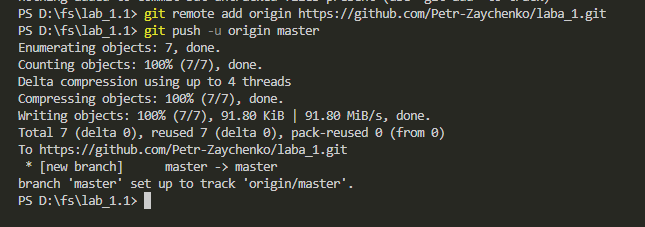


# FastApi


In [31]:
pip install python-multipart

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from fastapi import FastAPI, File, UploadFile
import pandas as pd
import joblib
from io import BytesIO

app = FastAPI()
model_path = "data/laptop_price_model.pkl"
model = joblib.load(model_path)

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    content = await file.read()
    df = pd.read_csv(BytesIO(content))
    predictions = model.predict(df)
    return {"predictions": predictions.tolist()}

In [33]:
!ngrok config add-authtoken 2wd5cydMgehF5yut5Zvk1JmccHi_4NcqEwFGqnpbeYm2H6YuC

Authtoken saved to configuration file: C:\Users\Петр\AppData\Local/ngrok/ngrok.yml


In [34]:
import subprocess
from threading import Thread

def run_fastapi():
    subprocess.run(["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000", "--reload"])

Thread(target=run_fastapi, daemon=True).start()

In [35]:
from pyngrok import ngrok

public_url = ngrok.connect(8000)
print("Ваш API доступен по адресу:", public_url)

Ваш API доступен по адресу: NgrokTunnel: "https://e971-193-187-173-210.ngrok-free.app" -> "http://localhost:8000"
